In [1]:
# pip install plotnine

import pandas as pd
import seaborn as sns
#import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
#from plotnine import *

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np
import sys, os, gc, traceback
from sklearn.preprocessing import LabelEncoder
#import missingno as msno
#from impyute.imputation.cs import mice
from scipy import stats
from sklearn.preprocessing import StandardScaler


class ErrorHandler(object):
    def handleErr(self, err):
        tb = sys.exc_info()[-1]
        stk = traceback.extract_tb(tb, 1)
        functionName = stk[0][2]
        return functionName + ":" + err
    
class ReadData():
    def __init__(self, parent=None):
        try:            
            self.errObj = ErrorHandler()

        except Exception as exp:
            err = self.errObj.handleErr(str(exp))
            print(str(err))
            
    def getData():
        dataFolder='Dataset'
        dataFilePath=os.path.join(dataFolder,'LoanApplyData-bank.csv')
        loanData=pd.read_csv(dataFilePath)
                  
        return loanData
        


class PreProcessor():
    def __init__(self, parent=None):
        try:
            self.errObj = ErrorHandler()

        except Exception as exp:
            err = self.errObj.handleErr(str(exp))
            print(str(err))
    def get_categorical_columns(data):
        numeric_columns=data._get_numeric_data().columns
        allColumns=data.columns
        cat_columns=list(set(allColumns)-set(numeric_columns))
        return cat_columns
    def encode_categorical_variables(data):
        le=LabelEncoder()
        cat_cols=PreProcessor.get_categorical_columns(data)
        for col in cat_cols:
            data[col]=le.fit_transform(data[col])
        return data
        
    def show_stats(data):
        data['target'].value_counts().plot.bar()
        print('Size of the data: \n ', data.shape)    
    def encode_target_feature(target):
        le=LabelEncoder()
        data[target]=le.fit_transform(data[target])
        return data
            
        
        


class visualizeCorrelation():
    def __init__(self, parent=None):
        try:
            self.errObj = ErrorHandler()

        except Exception as exp:
            err = self.errObj.handleErr(str(exp))
            print(str(err))

class MissingValue:
    def __init__(self, parent=None):
        try:
            self.errObj = ErrorHandler()
        except Exception as exp:
            err = self.errObj.handleErr(str(exp))
            print(str(err))
    def find_missing_value(df):
        #try:
            per_column_missing_value=df.isnull().sum()
            print('--------Missing value per column-----------\n',per_column_missing_value)
            # convert into percentage
            percent_missing=per_column_missing_value * 100 / len(df)
            missing_percent_data=pd.DataFrame({'column_name': df.columns, '%_missing': percent_missing})
            print('----------Missing %age---------\n',missing_percent_data)
            # draw a graph of missing values
            #per_column_missing_value.plot(kind='bar')
            #plt.show()
            missing_values=per_column_missing_value/len(df)
            missing_values=missing_values[missing_values>0]
            missing_values.sort_values(inplace=True)
            missing_values=missing_values.to_frame()
            missing_values.columns=['count']
            missing_values.index.names=['Name']
            missing_values['Name']=missing_values.index
            print('----Missing values-----\n',missing_values)

            sns.set(style='darkgrid',color_codes=True)
            sns.barplot(x='Name', y='count', data=missing_values)
            plt.xticks(rotation=90)
            plt.show()         
              
        
    def drop_columns_with_missing_value_gtr_than(data, percent_missing):
        # find missing percentage per column
        missing_data=data.count/len(data)
        missing_data=(1-missing_data)*100
        missing_data=missing_data.to_frame()
        missing_data.columns=['percent']
        missing_data.index.names=['column']
        to_be_dropped=list(missing_data[missing_data['percent']>percent_missing].index.values)
        data.drop(to_be_dropped, axis = 1, inplace=True)
        return data
    
    def impute_missing_value(data):
        num_cols=['age', 'balance', 'duration']
        imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
        data[num_cols]=imputer.fit_transform(data[num_cols])
        print('-------------Missing data imputation----------\n',data)
        
        
class Outlier:
    
    def __init__(self, parent=None):
        try:
            self.errObj = ErrorHandler()
        except Exception as exp:
            err = self.errObj.handleErr(str(exp))
            print(str(err))
    def detect_outlier_by_iqr(data):
        num_cols=['age', 'balance', 'duration']
        q25=data[num_cols].quantile(.25)
        q75=data[num_cols].quantile(.75)
        iqr=q75-q25
        cutoff=iqr*1.5
        lower,upper=q25-cutoff, q75+cutoff
        outliers=((data[num_cols] < (q25 - cutoff)) | (data[num_cols] > (q75 + cutoff))).sum()
        print('---------Outlier by IQR:------------ \n',outliers)
    def detect_outlier_by_zscore(data):
        num_cols=data.select_dtypes(include=[np.number]).columns
        print('---------------Outlier by zscore:------------- \n',data[num_cols].apply(stats.zscore))
    def detect_outlier_by_dbscan(data):
        pass
    def visualize_outliers_univariate(data):
        print('Visualize numerical columns:')
        num_cols=['age', 'balance', 'duration']
        plt.figure(1)
        i=1
        for col in num_cols: 
            plt.subplot(3,2,i)
            i=i+1
            sns.distplot(data[col])
            plt.subplot(3,2,i)
            data[col].plot.box(figsize=(16,20))
            i=i+1

        plt.show()
        
        print('-----------------Visualize Categorical Variables:-----------------')
        plt.figure(1)

        cat_cols=['target', 'job', 'month', 'contact', 'default', 'loan', 'housing', 'marital', 'education',
         'poutcome', 'pdays','previous']
        i=1
        for col in cat_cols:
            plt.subplot(12,1,i)
            data[col].value_counts(normalize=True).plot.bar(figsize=(8,30), title=col)
            i=i+1
            plt.show()
        
    
class FE:
    def __init__(self, parent=None):
        try:
            self.errObj = ErrorHandler()
        except Exception as exp:
            err = self.errObj.handleErr(str(exp))
            print(str(err))
    def perform_feature_engg(data):
        print('----------Feature Engineering-------------\n')
        data_new=data.copy()
        # bin age groups and create new column
        bins=[19,20,30, 40, 50, 60, 70, 80,90 ]
        labels=['<20','20-30','30-40','40-50','50-60','60-70', '70-80','>80']
        data_new['AgeGroup']=pd.cut(data_new['age'], bins=bins, labels=labels, right=False)
        print('----------AgeGroup column------------\n',data_new['AgeGroup'])
        
        # bin duration into groups and add new column
        bins=[30,100,250,350,450,np.inf]
        labels=['<100','100-250','250-350','350-450','>450']
        data_new['DurationGroups']=pd.cut(data_new['duration'], bins=bins, labels=labels,right=False)
        print('-------------Duration groups column------------ \n',data_new['DurationGroups'])
        
        # bin balance column in groups and add new column
        bins=[-3314.0,0, 1400.0,5000.0, np.inf ]
        labels=['Poor','Low','Average','High']        
        data_new['BalanceGroup']=pd.cut(data_new['balance'],bins=bins, labels=labels)
        print('-------------BalanceGroup column--------------\n',data_new['BalanceGroup'])    
      
        
        # concatenate agegroup and job columns to create new column
        data_new['JobPerAgeGroup']=data_new['job']+'_'+data_new['AgeGroup'].astype(str)
        print('--------------Job per age group column-------------\n',data_new['JobPerAgeGroup'])      
        
        return data_new
        
        
    def visualize_categorical_bivariate(data):
        cat_cols=['job', 'month', 'contact', 'default', 'loan', 'housing', 'marital', 'education',
         'poutcome', 'pdays','previous', 'campaign']
        target='target'
        print('-------------Categorical feature variable VS target variable------------\n')
        for col in cat_cols:
            df_freq=pd.crosstab(data[col], data[target])    
            df_freq.div(df_freq.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(8,8))
        
    def visualize_numerical_bivariate(data):  
        cat_cols=['AgeGroup','BalanceGroup','DurationGroups','JobPerAgeGroup']
        target='target'
        print('-------------New FE variable VS target variable------------\n')
        for col in cat_cols:
            df_freq=pd.crosstab(data[col], data[target])    
            df_freq.div(df_freq.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(20,20))
            plt.ylabel('Percentage')

        
        
        

        

class Scaling:
    def __init__(self, parent=None):
        try:
            self.errObj = ErrorHandler()
        except Exception as exp:
            err = self.errObj.handleErr(str(exp))
            print(str(err))
    def scale_numeric_features(data):
        num_cols=['age', 'balance', 'duration']
        features=data[num_cols]
        scaler=StandardScaler().fit(features.values)
        features=scaler.transform(features.values)
        data[num_cols]=features
        print('---------------Scaling the numeric features---------------\n',data)
        return data
            
            
def main():


    if __name__ == '__main__':
        main()


Size of the data: 
  (4521, 17)
--------Missing value per column-----------
 age          77
job           0
marital       0
education     0
default       0
balance       6
housing       0
loan          0
contact       0
day           0
month         0
duration      3
campaign      0
pdays         0
previous      0
poutcome      0
target        0
dtype: int64
----------Missing %age---------
           column_name  %_missing
age               age   1.703163
job               job   0.000000
marital       marital   0.000000
education   education   0.000000
default       default   0.000000
balance       balance   0.132714
housing       housing   0.000000
loan             loan   0.000000
contact       contact   0.000000
day               day   0.000000
month           month   0.000000
duration     duration   0.066357
campaign     campaign   0.000000
pdays           pdays   0.000000
previous     previous   0.000000
poutcome     poutcome   0.000000
target         target   0.000000
----Missing

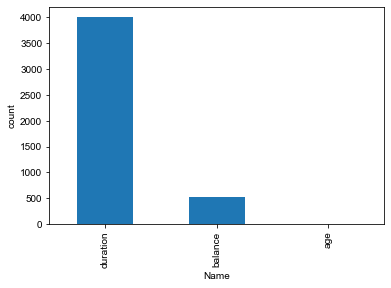

-------------Missing data imputation----------
        age            job  marital  education default      balance housing  \
0     30.0     unemployed  married    primary      no  1421.713621      no   
1     33.0       services  married  secondary      no  4789.000000     yes   
2     35.0     management   single   tertiary      no  1350.000000     yes   
3     30.0     management  married   tertiary      no  1476.000000     yes   
4     59.0    blue-collar  married  secondary      no     0.000000     yes   
...    ...            ...      ...        ...     ...          ...     ...   
4516  33.0       services  married  secondary      no  -333.000000     yes   
4517  57.0  self-employed  married   tertiary     yes -3313.000000     yes   
4518  57.0     technician  married  secondary      no   295.000000      no   
4519  28.0    blue-collar  married  secondary      no  1137.000000      no   
4520  44.0   entrepreneur   single   tertiary      no  1136.000000     yes   

     loan   con

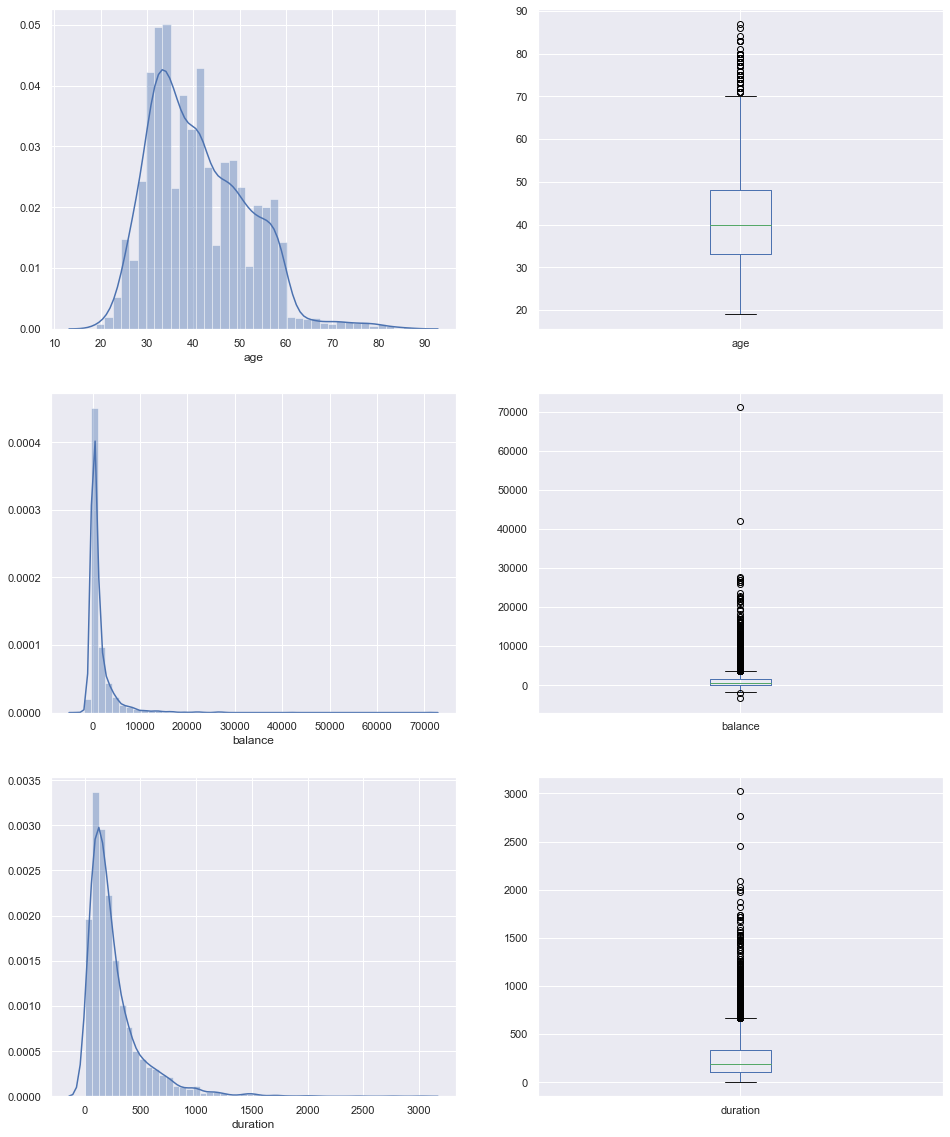

-----------------Visualize Categorical Variables:-----------------


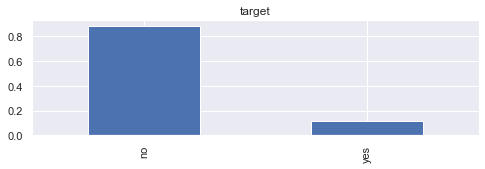

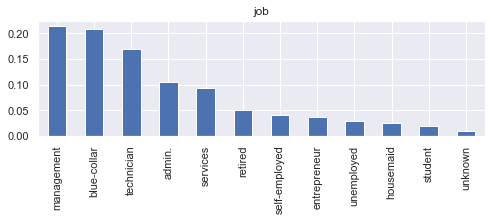

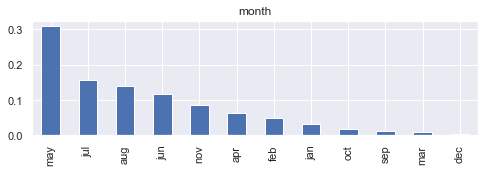

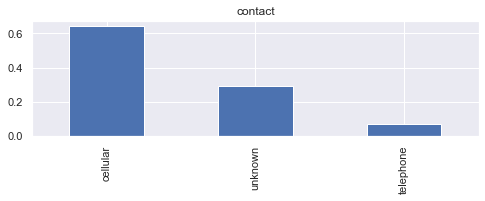

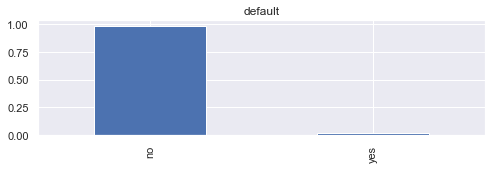

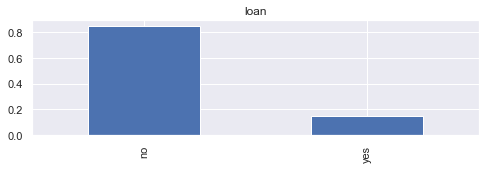

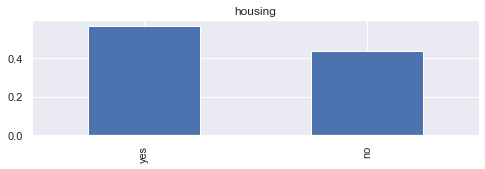

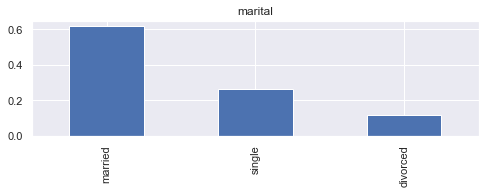

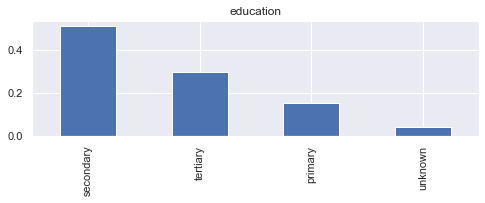

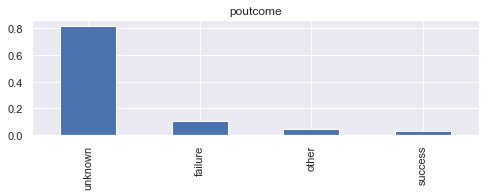

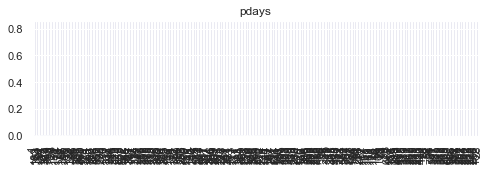

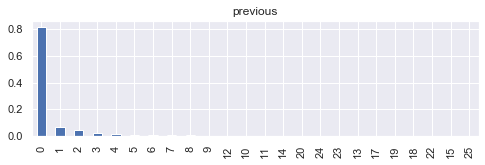

----------Feature Engineering-------------

----------AgeGroup column------------
 0       30-40
1       30-40
2       30-40
3       30-40
4       50-60
        ...  
4516    30-40
4517    50-60
4518    50-60
4519    20-30
4520    40-50
Name: AgeGroup, Length: 4521, dtype: category
Categories (8, object): [<20 < 20-30 < 30-40 < 40-50 < 50-60 < 60-70 < 70-80 < >80]
-------------Duration groups column------------ 
 0          <100
1       100-250
2       250-350
3       100-250
4       100-250
         ...   
4516    250-350
4517    100-250
4518    100-250
4519    100-250
4520    250-350
Name: DurationGroups, Length: 4521, dtype: category
Categories (5, object): [<100 < 100-250 < 250-350 < 350-450 < >450]
-------------BalanceGroup column--------------
 0       Average
1       Average
2           Low
3       Average
4          Poor
         ...   
4516       Poor
4517       Poor
4518        Low
4519        Low
4520        Low
Name: BalanceGroup, Length: 4521, dtype: category
Categories (4

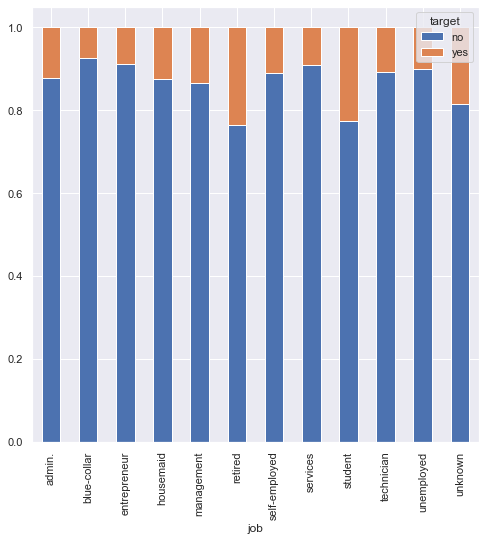

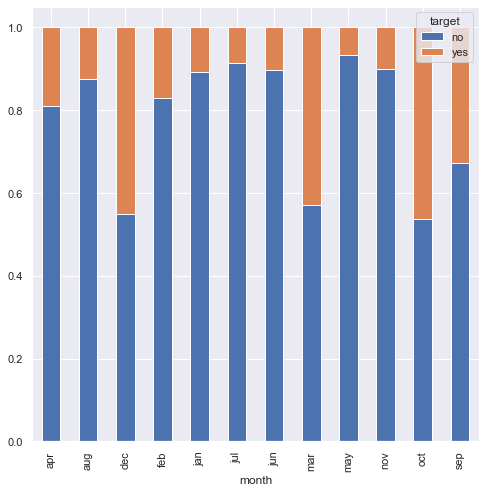

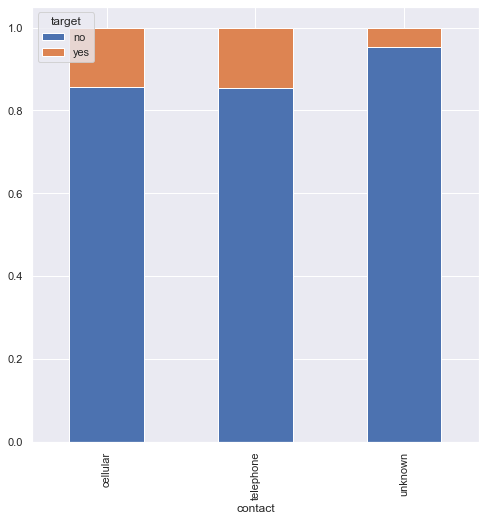

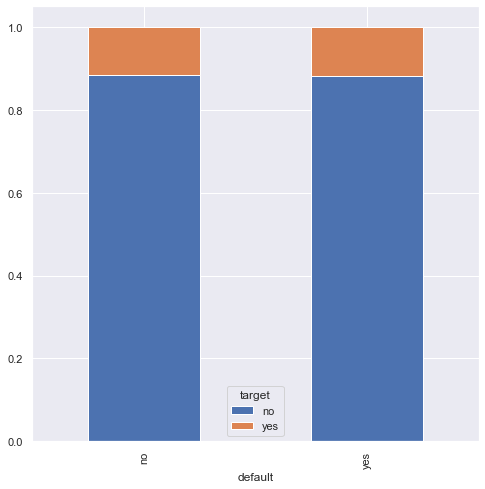

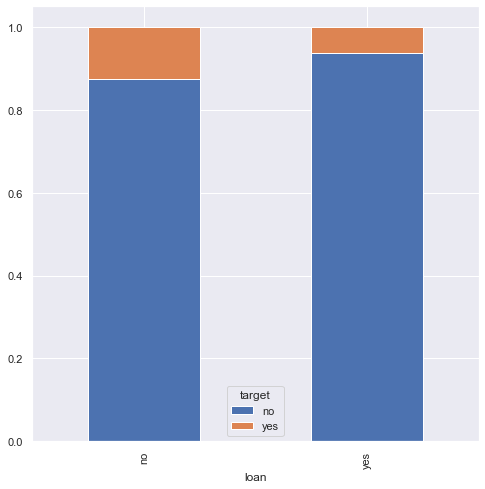

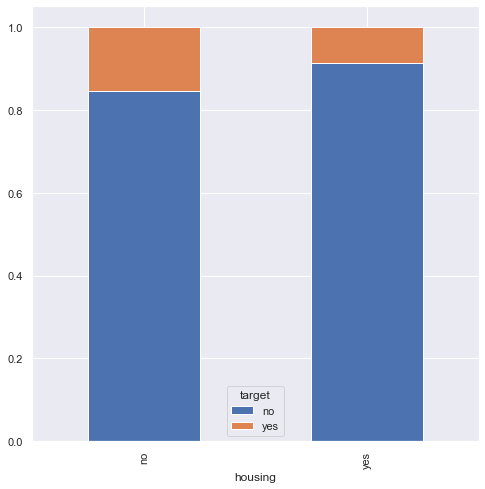

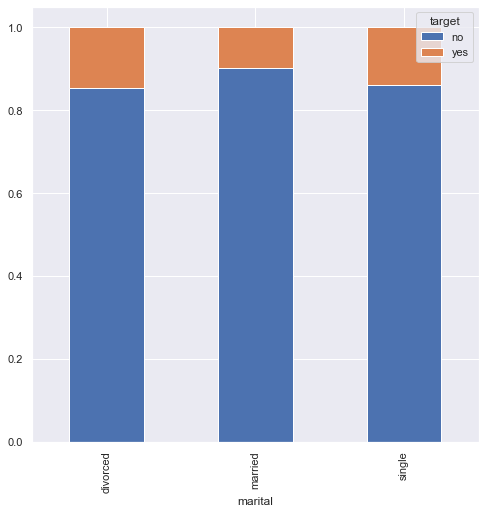

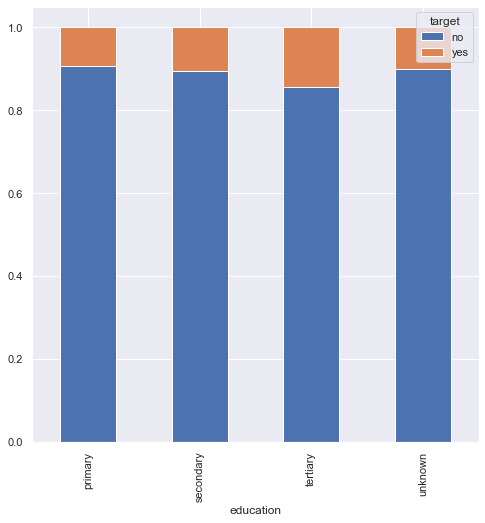

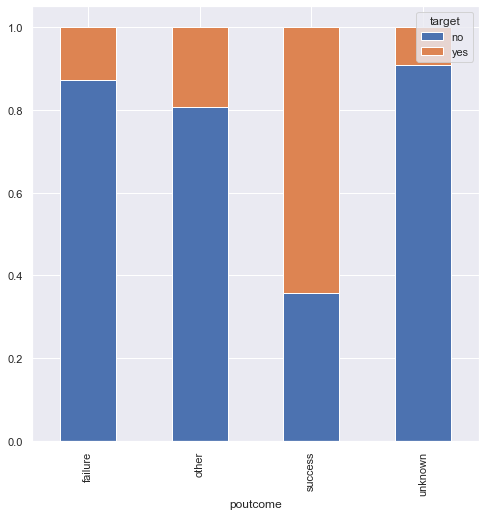

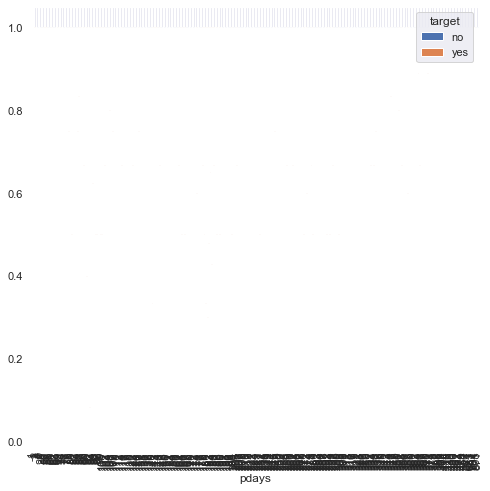

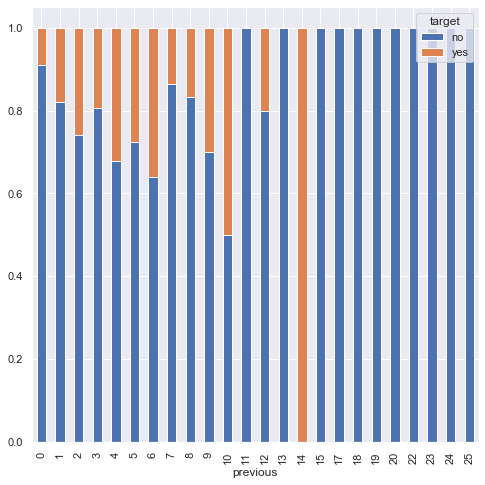

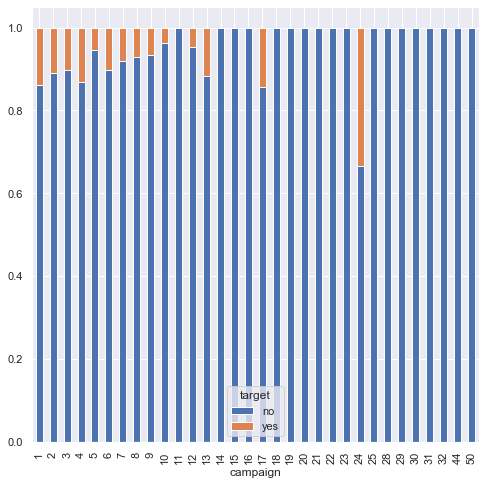

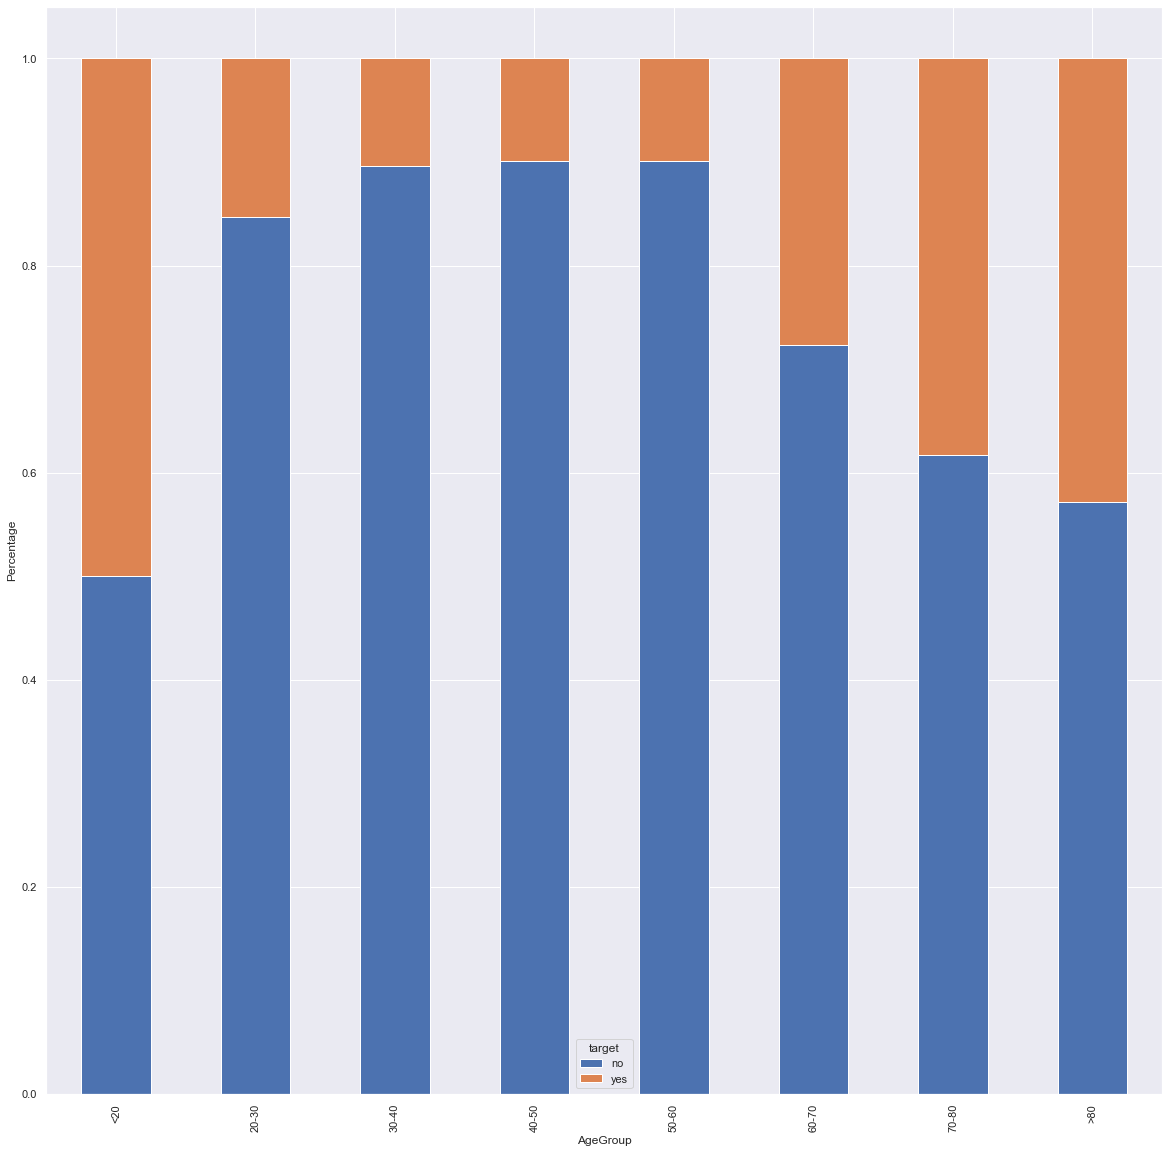

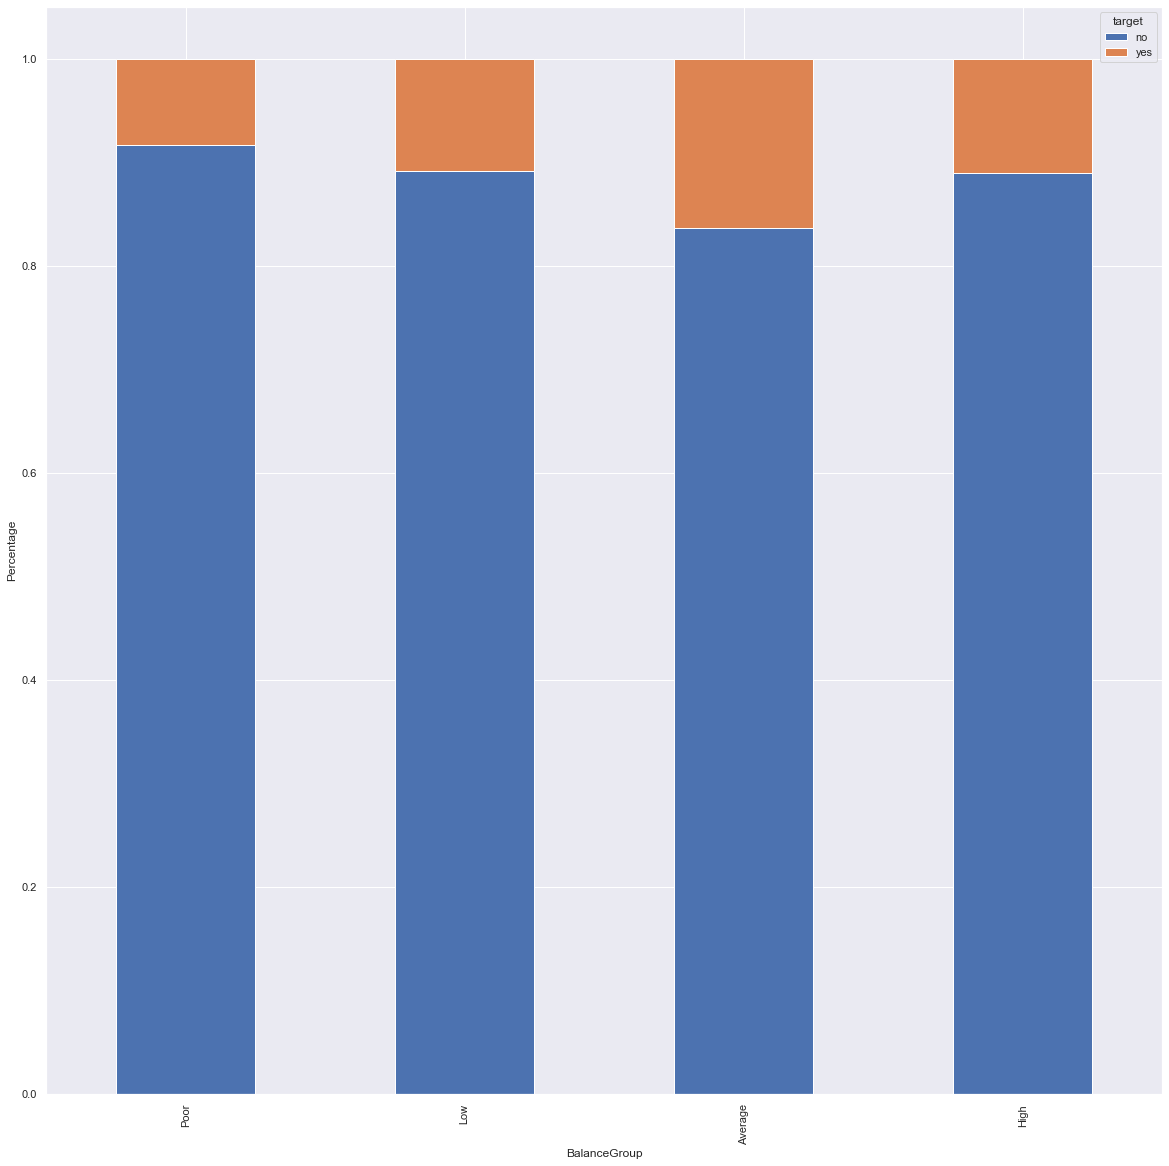

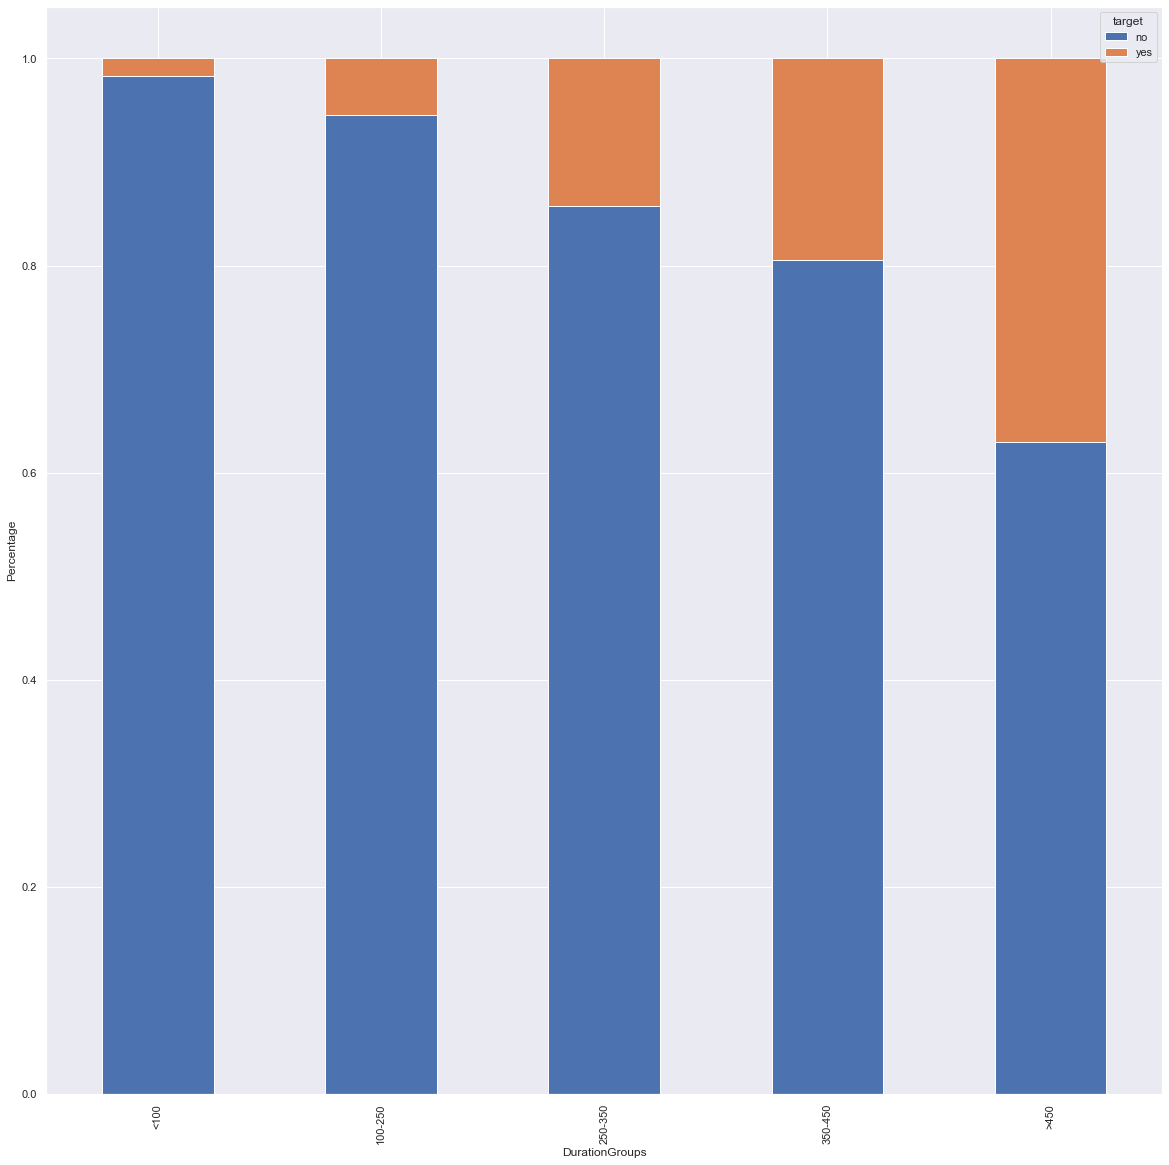

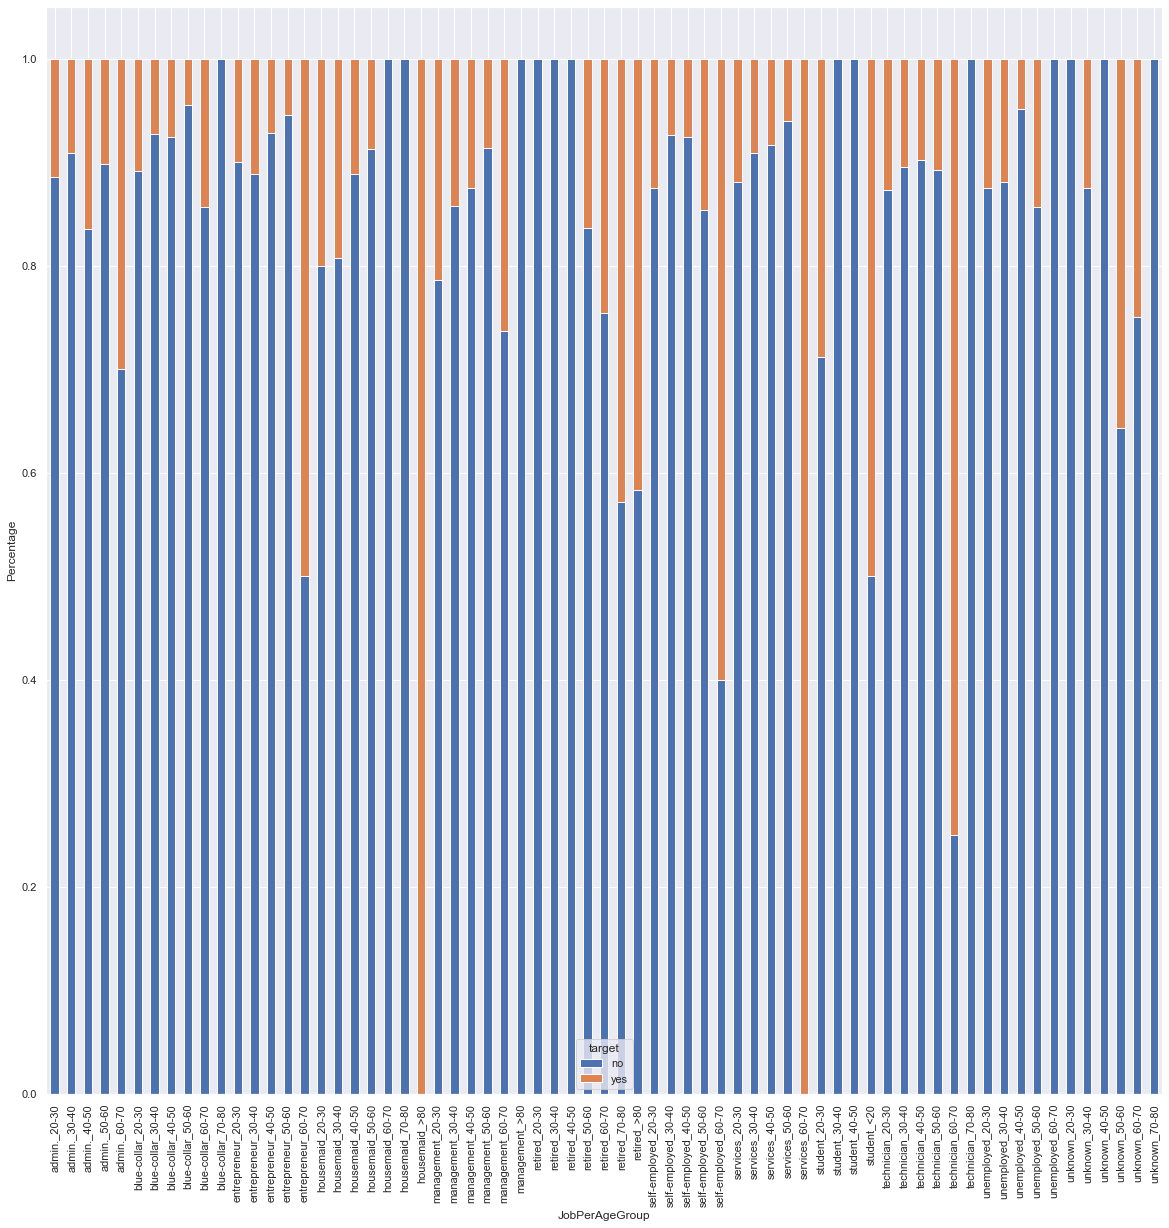

In [2]:
data=ReadData.getData()
PreProcessor.show_stats(data)
MissingValue.find_missing_value(data)
MissingValue.impute_missing_value(data)
Outlier.detect_outlier_by_zscore(data)
Outlier.detect_outlier_by_iqr(data)
Outlier.visualize_outliers_univariate(data)
data_fe=FE.perform_feature_engg(data)
FE.visualize_categorical_bivariate(data)
FE.visualize_numerical_bivariate(data_fe)

In [36]:
Scaling.scale_numeric_features(data)

---------------Scaling the numeric features---------------
            age            job  marital  education default   balance housing  \
0    -1.066345     unemployed  married    primary      no  0.000000      no   
1    -0.780839       services  married  secondary      no  1.119376     yes   
2    -0.590501     management   single   tertiary      no -0.023840     yes   
3    -1.066345     management  married   tertiary      no  0.018046     yes   
4     1.693552    blue-collar  married  secondary      no -0.472615     yes   
...        ...            ...      ...        ...     ...       ...     ...   
4516 -0.780839       services  married  secondary      no -0.583314     yes   
4517  1.503214  self-employed  married   tertiary     yes -1.573945     yes   
4518  1.503214     technician  married  secondary      no -0.374550      no   
4519 -1.256683    blue-collar  married  secondary      no -0.094646      no   
4520  0.266019   entrepreneur   single   tertiary      no -0.094979    

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,-1.066345,unemployed,married,primary,no,0.000000,no,no,cellular,19,oct,-7.121928e-01,1,-1,0,unknown,no
1,-0.780839,services,married,secondary,no,1.119376,yes,yes,cellular,11,may,-1.694903e-01,1,339,4,failure,no
2,-0.590501,management,single,tertiary,no,-0.023840,yes,no,cellular,16,apr,2.187877e-16,1,330,1,failure,no
3,-1.066345,management,married,tertiary,no,0.018046,yes,yes,unknown,3,jun,-2.503183e-01,4,-1,0,unknown,no
4,1.693552,blue-collar,married,secondary,no,-0.472615,yes,no,unknown,5,may,-1.463966e-01,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,-0.780839,services,married,secondary,no,-0.583314,yes,no,cellular,30,jul,2.500457e-01,5,-1,0,unknown,no
4517,1.503214,self-employed,married,tertiary,yes,-1.573945,yes,yes,unknown,9,may,-4.273702e-01,1,-1,0,unknown,no
4518,1.503214,technician,married,secondary,no,-0.374550,no,no,cellular,19,aug,-4.350681e-01,11,-1,0,unknown,no
4519,-1.256683,blue-collar,married,secondary,no,-0.094646,no,no,cellular,6,feb,-5.197451e-01,4,211,3,other,no
